## Introduction
In this particular kernel, we will be exploring the Iris dataset that will contain the various values of petal length,width alongwith sepal length,width.

We shall be using the unsupervised learning method called KMeans clustering to label the various categories and we will
predict the optimum number of clusters and represent it visually.

## Step 1: Importing required libraries and the dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
df_iris=pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: Data cleaning

1. Id column is unnecessary and hence, we will drop it. 

2. word Iris has been repeated every time which provides no extra info. Hence, we will remove the iris word from the Species column.

In [80]:
df_iris.drop('Id',axis=1, inplace = True)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
df_iris['Species']=df_iris.Species.str.rsplit('-',expand=True)[1]

In [82]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 3: Data visualization

we wil use pairplot to visualize the data and it's distribution

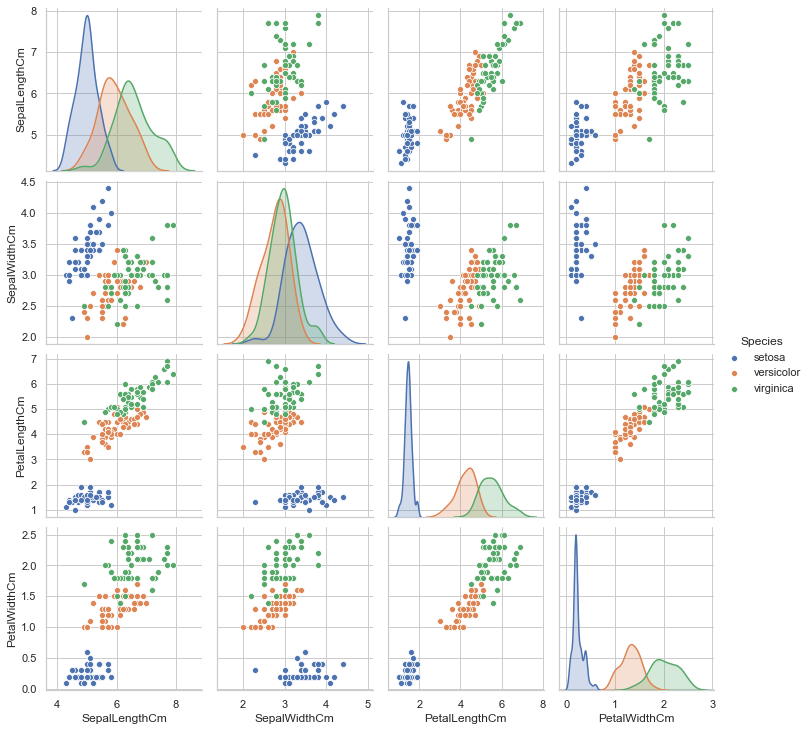

In [84]:
sns.set_style("whitegrid");
sns.pairplot(data=df_iris, hue="Species");

Here we can see the distribution of petal length and petal width is well defined so, petal length and petal width are the most useful features to identify various flower types.

While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).



## Step 4: Performing unsupervised learning

In [33]:
# Finding the optimum number of clusters for k-means classification
df_labels=df_iris['Species']
df_iris.drop('Species',axis=1,inplace=True)

In [52]:
from sklearn.cluster import KMeans

wcss=[]
clusters=np.arange(1,11)
X=df_iris.values
for i in range(1,11):
    kmeans = KMeans(n_clusters = i) # our clusters ranging from K=1 to K=10.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

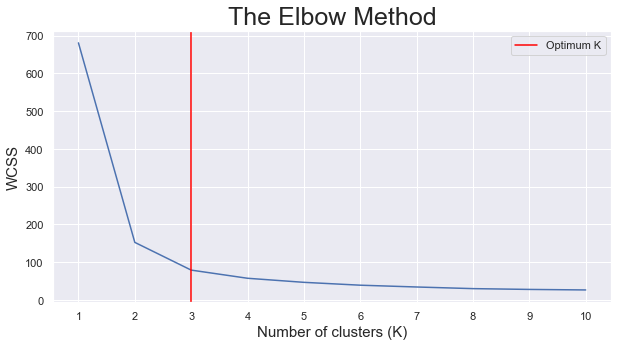

In [54]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
plt.title('The Elbow Method',size=25)
plt.plot(clusters,wcss)
plt.axvline(3,color='red',label='Optimum K')
plt.xticks(np.arange(1,11))
plt.xlabel('Number of clusters (K)',size=15)
plt.ylabel('WCSS',size=15)
plt.legend();

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

### K = 3 cluster solution

In [56]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

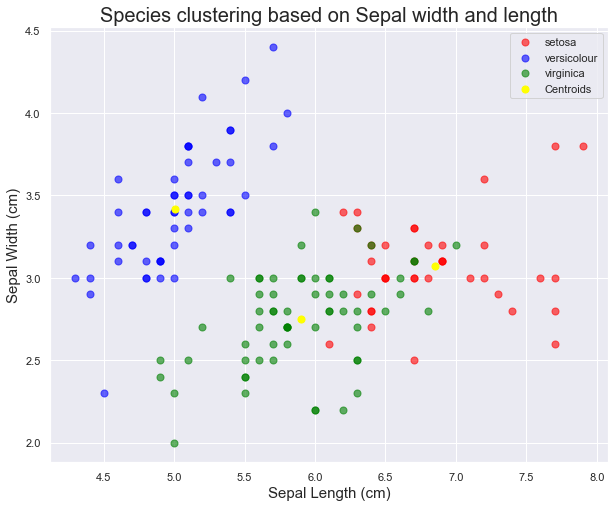

In [68]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.title('Species clustering based on Sepal width and Sepal length',size=20)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 50,alpha=0.6, c = 'red', label = 'setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 50,alpha=0.6, c = 'blue', label = 'versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 50,alpha=0.6, c = 'green', label = 'virginica')

plt.xlabel('Sepal Length (cm)',size=15)
plt.ylabel('Sepal Width (cm)',size=15)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend();

#### Let us now perform the same for  Petal width and Petal  length.

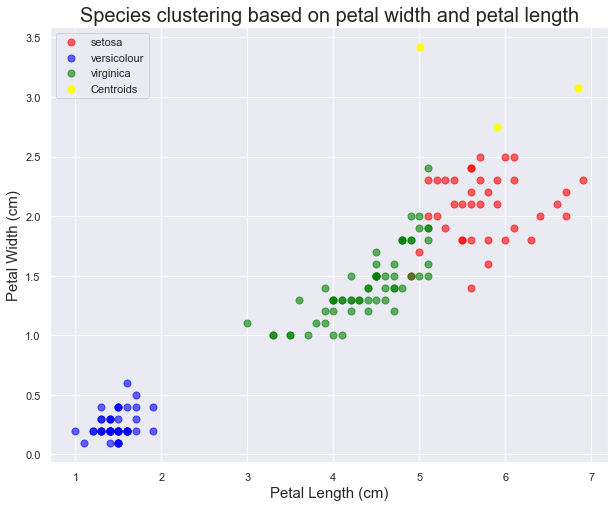

In [86]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
plt.title('Species clustering based on petal width and petal length',size=20)

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 50,alpha=0.6, c = 'red', label = 'setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 50,alpha=0.6, c = 'blue', label = 'versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 50,alpha=0.6, c = 'green', label = 'virginica')

plt.xlabel('Petal Length (cm)',size=15)
plt.ylabel('Petal Width (cm)',size=15)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend();

## Conclusion

using KMeans clustering, we could label most of the clusters correctly. Some of the points couldn't be classified correctly. However, majority of the points could be segmented accurately. Hence, unsupervised learning such as KMeans can be really beneficial when we don't have the labels with us to check the accuracy of our answers.